In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 10

Arquivos extraídos do Microdados INEP

In [4]:
file_resp = '../dados/TS_ITEM.csv'

In [5]:
file_alunos_3EM_ESC = '../dados/TS_ALUNO_3EM_ESC.csv'
# file_alunos_3EM_AG = '../dados/TS_ALUNO_3EM_AG.csv'
file_alunos_9EF = '../dados/TS_ALUNO_9EF.csv'
file_alunos_5EF = '../dados/TS_ALUNO_5EF.csv'

Conjunto Definido de Colunas à Serem Utilizadas

Identificadores das Colunas

In [6]:

RESPOSTAS_INVALIDAS = ['X', '.', '*', ' ', '']

ID_SERIE = 'ID_SERIE'
TIPO_PROVA = 'TIPO_PROVA'
DISCIPLINA = 'DISCIPLINA'
ID_SERIE_ITEM = 'ID_SERIE_ITEM'
ID_BLOCO = 'ID_BLOCO'
ID_POSICAO = 'ID_POSICAO'
GABARITO = 'GABARITO'
ID_PROVA_BRASIL = 'ID_PROVA_BRASIL' # Ano da Prova, pode ser ignorado, pois os arquivos são baixados por ano
ID_UF = 'ID_UF'
ID_MUNICIPIO = 'ID_MUNICIPIO'

# Preenchimento Prova
# ID_SERIE = 'ID_SERIE'
ID_ALUNO = 'ID_ALUNO'
IN_PREENCHIMENTO_PROVA = 'IN_PREENCHIMENTO_PROVA'
IN_PRESENCA_PROVA = 'IN_PRESENCA_PROVA'
ID_REGIAO = 'ID_REGIAO'
ID_AREA = 'ID_AREA'
# Respostas da Prova
ID_BLOCO_1 = 'ID_BLOCO_1'
ID_BLOCO_2 = 'ID_BLOCO_2'
TX_RESP_BLOCO_1_LP = 'TX_RESP_BLOCO_1_LP'
TX_RESP_BLOCO_2_LP = 'TX_RESP_BLOCO_2_LP'
TX_RESP_BLOCO_1_MT = 'TX_RESP_BLOCO_1_MT'
TX_RESP_BLOCO_2_MT = 'TX_RESP_BLOCO_2_MT'
# Proeficiência do ALuno
PESO_ALUNO_LP = 'PESO_ALUNO_LP'
PESO_ALUNO_MT = 'PESO_ALUNO_MT'
PROFICIENCIA_LP = 'PROFICIENCIA_LP'
ERRO_PADRAO_LP = 'ERRO_PADRAO_LP'
PROFICIENCIA_LP_SAEB = 'PROFICIENCIA_LP_SAEB'
ERRO_PADRAO_LP_SAEB = 'ERRO_PADRAO_LP_SAEB'
PROFICIENCIA_MT = 'PROFICIENCIA_MT'
ERRO_PADRAO_MT = 'ERRO_PADRAO_MT'
PROFICIENCIA_MT_SAEB = 'PROFICIENCIA_MT_SAEB'
ERRO_PADRAO_MT_SAEB = 'ERRO_PADRAO_MT_SAEB'
# Questionário Socioeconômico
IN_PREENCHIMENTO_QUESTIONARIO = 'IN_PREENCHIMENTO_QUESTIONARIO'
TX_RESP_Q001 = 'TX_RESP_Q001' # Sexo
TX_RESP_Q002 = 'TX_RESP_Q002' # Cor/Raça

In [7]:
colunas_resp = [ID_SERIE, TIPO_PROVA, DISCIPLINA, ID_SERIE_ITEM, ID_BLOCO, ID_POSICAO, GABARITO]
# DESCRITOR_HABILIDADE

In [8]:
colunas_aluno = [
    # ID_ALUNO,
    # ID_PROVA_BRASIL,
    ID_UF, ID_MUNICIPIO, ID_REGIAO, ID_AREA,
    ID_SERIE, IN_PREENCHIMENTO_PROVA, # IN_PRESENCA_PROVA,
    ID_BLOCO_1, ID_BLOCO_2,
    TX_RESP_BLOCO_1_LP, TX_RESP_BLOCO_2_LP, TX_RESP_BLOCO_1_MT, TX_RESP_BLOCO_2_MT,
    # PESO_ALUNO_LP, PESO_ALUNO_MT,
    PROFICIENCIA_LP, # ERRO_PADRAO_LP, PROFICIENCIA_LP_SAEB, ERRO_PADRAO_LP_SAEB,
    PROFICIENCIA_MT, # ERRO_PADRAO_MT, PROFICIENCIA_MT_SAEB, ERRO_PADRAO_MT_SAEB,
    # IN_PREENCHIMENTO_QUESTIONARIO,
    TX_RESP_Q001,
    TX_RESP_Q002
]

#### Gabarito, 666 itens corrigidos (+36KB)

#### 5SEM,     2.624.019 provas (+360MB)
#### 9SEM,     2.341.459 provas (+321MB)
#### 3SEMAG,   1.966.507 provas (+270MB)
###### 3SEMESC,  1.456.325 provas (+200MB)

In [9]:
df_gabarito = pd.read_csv(
    file_resp,
    delimiter=';', encoding='iso-8859-1',
    usecols=colunas_resp,
    # low_memory=True
)

In [10]:
df_gabarito.sample(10)

,ID_SERIE,TIPO_PROVA,DISCIPLINA,ID_SERIE_ITEM,ID_BLOCO,ID_POSICAO,GABARITO
80,3,Prova Regular,LP,3,7,3,E
100,3,Macrotipo 18 e 24,LP,3,1,12,A
301,5,Prova Regular,LP,5,7,2,B
646,9,Macrotipo 18 e 24,MT,9,1,5,D
575,9,Prova Regular,MT,9,3,1,D
318,5,Macrotipo 18 e 24,LP,5,1,8,D
597,9,Prova Regular,MT,9,4,10,C
109,3,Macrotipo 18 e 24,LP,3,2,5,E
534,9,Macrotipo 18 e 24,LP,9,1,13,B
296,5,Prova Regular,LP,5,6,8,A


In [11]:
df_gabarito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 7 columns):
ID_SERIE         666 non-null int64
TIPO_PROVA       666 non-null object
DISCIPLINA       666 non-null object
ID_SERIE_ITEM    666 non-null int64
ID_BLOCO         666 non-null int64
ID_POSICAO       666 non-null int64
GABARITO         666 non-null object
dtypes: int64(4), object(3)
memory usage: 36.5+ KB


Geralmente 15 segundos para carregar o conjunto de dados selecionado

In [12]:
df_aluno_5EF = pd.read_csv(
    file_alunos_5EF,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True, 
    nrows=20000  # Para fazer testes com os dados
)

In [13]:
df_aluno_9EF = pd.read_csv(
    file_alunos_9EF,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True,
    nrows=20000  # Para fazer testes com os dados
)

In [14]:
# df_aluno_3EM_AG = pd.read_csv(
#     file_alunos_3EM_AG,
#     delimiter=',', encoding='iso-8859-1',
#     usecols=colunas_aluno,
#     low_memory=True, 
# )

In [15]:
df_aluno_3EM = pd.read_csv(
    file_alunos_3EM_ESC,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True,
    nrows=20000  # Para fazer testes com os dados
)

In [16]:
df_aluno_5EF.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
18283,1,11,1100254,2,5,0,1,2,...........,...........,...........,...........,NaN,NaN,NaN,NaN
3787,1,11,1100064,2,5,1,7,1,BBAADAAABCB,BCDABCBBBAA,BDDADCBDDBD,DDCCDBCDCAA,-1.222115,-1.536163,B,C
1718,1,11,1100023,2,5,1,1,3,DCBCBACABAD,BCCACBDABDB,CDBACBCDBDC,DAACBCDABAC,-2.199380,-1.372138,A,A
6202,1,11,1100114,2,5,1,2,5,DAADDDDCBCC,DDACDDCDDBD,ADABCBACBDD,ABDCDCDDCCC,0.187625,-0.636514,B,B
7606,1,11,1100122,2,5,1,7,1,ABACACCAACD,CAADCBBACBC,BDADCDDCDAD,CAABDAADDDD,-1.768023,-2.227414,B,F
13211,1,11,1100205,1,5,1,3,6,DDADBCDCACA,BDACBBAACCC,DBACABBCBAB,CCCBABDDBBC,0.299707,0.222119,A,D
6236,1,11,1100114,2,5,1,7,3,BBDCCDBABAB,DDADACDCAAA,CCADCCBDDCA,DAACBABDBCC,-0.290305,-0.644203,B,F
4767,1,11,1100098,2,5,1,6,7,BDBCBBAABBC,DBBDDDBADAD,CACBCBDDBBC,CCADBCBDCCB,-0.375362,0.120138,A,C
6108,1,11,1100114,2,5,1,1,2,BCCDBCBDBBB,DAADACDBBCB,DCADCBDABCD,BBBACACCBAB,0.217137,0.951859,B,A
14392,1,11,1100205,1,5,1,3,4,CDADBADDADB,ACCDBADCCBD,CAACABCCBCD,DDCAAACDBBC,-1.315705,-0.650514,B,E


In [17]:
df_aluno_9EF.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
15286,1,11,1100262,2,9,1,5,1,BCDCCAAACBBAB,CDCCAACADADBC,CDACDADBCBBAB,CDCDDDBCABACB,0.523593,0.804745,A,E
10798,1,11,1100205,1,9,1,6,2,ABABCCDCCBDCA,ACBAACDACDBDD,ABBACBCBBDADA,DACDAABCDCBBD,-1.842140,-1.136388,A,C
16074,1,11,1100288,2,9,1,7,1,BABCDBCCBACBC,CBCDADAABDAAB,BACCACCBCCCCB,DBBCCBBBADACA,-0.982997,-0.416648,A,B
2359,1,11,1100049,2,9,1,5,6,BCACDACDCABCB,BBCCBCCDCDCBA,CBAABDDCBDBAC,ABCCDAABCDDBB,0.579864,-0.183723,A,C
7368,1,11,1100130,2,9,0,4,6,.............,.............,.............,.............,NaN,NaN,NaN,NaN
7488,1,11,1100130,2,9,1,7,3,ADDBCBBABBACD,CBADAACABCDCD,BADCADDBABBAB,DBDCADBCAABBD,0.591097,0.540359,B,C
6728,1,11,1100122,2,9,1,5,7,BDACCBADBBBAB,ACDACBCABAAAC,ADBDBDDCCBCAB,BABCAADABADBD,0.312667,0.386372,A,F
6599,1,11,1100122,2,9,0,3,6,.............,.............,.............,.............,NaN,NaN,NaN,NaN
13613,1,11,1100205,1,9,1,1,4,CDBDBADACC.DC,DBCDC.BADD...,CCBD.DBCAB.DB,BADBC.CCCCCCA,0.980459,1.584264,B,D
2212,1,11,1100049,2,9,1,7,3,ADDBDBAABCACD,CBDDAAAABACDD,DABCDDDBAABBC,DBCCDABDDDDCD,0.338875,0.296104,B,A


In [18]:
df_aluno_3EM.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
2456,1,11,1100114,2,12,1,3,5,CEDAEEBCDADED,BEEABBCACEEAB,CDAEACADBDDAE,EDADECBCCEBEA,-1.087419,-1.104918,B,C
3312,1,11,1100122,2,12,1,7,2,ACACAEACABCCE,BDEEEADCADAAD,DABDDEBCCDAED,DCAEACDADEBCD,-1.109221,-0.474568,A,F
14099,1,12,1200401,1,12,1,3,6,ABEABEDDAEEAD,BEEDCABCBADBE,ECADDBCADBCED,BABCEABACCBBD,1.532611,1.262610,B,C
8340,1,11,1100338,2,12,1,4,5,BDACECBDCBDEA,CBDAEDCDBCADB,CDBDCACDAEBDC,ACBDEBDCDBDEA,-1.476785,0.749589,A,C
230,1,11,1100015,2,12,1,3,5,CADCAABACCCBA,BBADBABABAABE,CABDBACABEBCB,ABAEABDDDBCAA,-1.502212,-0.442278,B,C
9308,1,11,1100809,2,12,1,1,2,BEEECEBABBECD,DBAAEDDDDBECD,CDEEAEDDBBAAD,DDCEAADCDAACC,1.965083,0.749637,B,C
17830,1,12,1200500,2,12,1,6,7,BEDDCCBBBEDEE,CCEBEDACCCDDC,CCBADBBDDCDDA,EBBDBACCAAABC,0.910448,-0.332099,B,C
12926,1,12,1200203,2,12,1,3,4,CBEBBEDDAEEAD,EBCACAABCCABE,EBACCBCAAACED,CBDDCCCDAEBEB,2.168658,0.536097,B,A
16716,1,12,1200401,1,12,1,6,2,BEEDBCBDBABBB,DCBABCDDDAAED,BCADDEBDCCEEA,DBCDABDBCAAEC,0.559332,0.877775,B,C
18289,1,12,1200708,2,13,1,6,1,CEDDBDBDBDDDC,EEACCCDABCDDB,BAADEBBABBCDC,CCBABEAACDAAA,-0.140228,0.788156,A,C


In [19]:
# Após o carregamento, o pandas reorganiza as colunas, logo:
colunas_aluno = list(df_aluno_5EF.columns.values)

### Série
idx_serie_gab = colunas_resp.index(ID_SERIE)
idx_serie_aluno = colunas_aluno.index(ID_SERIE)

### R. Respostas
idx_disciplina = colunas_resp.index(DISCIPLINA)
idx_posicao_gabarito = colunas_resp.index(ID_POSICAO)
idx_gabarito = colunas_resp.index(GABARITO)
idx_preenchimento_prova = colunas_aluno.index(IN_PREENCHIMENTO_PROVA)
# idx_presenca_prova = colunas_aluno.index(IN_PRESENCA_PROVA)
# idx_preenchimento_questionario = colunas_aluno.index(IN_PREENCHIMENTO_QUESTIONARIO)

### Blocos
bloco_gab = colunas_resp.index(ID_BLOCO) 
bloco_resp_1 = colunas_aluno.index(ID_BLOCO_1)
bloco_resp_2 = colunas_aluno.index(ID_BLOCO_2)
aluno_resp_bloco_1_lp = colunas_aluno.index(TX_RESP_BLOCO_1_LP) 
aluno_resp_bloco_2_lp = colunas_aluno.index(TX_RESP_BLOCO_2_LP) 
aluno_resp_bloco_1_mt = colunas_aluno.index(TX_RESP_BLOCO_1_MT) 
aluno_resp_bloco_2_mt = colunas_aluno.index(TX_RESP_BLOCO_2_MT) 

### Região de Estudo/Aluno
idx_uf = colunas_aluno.index(ID_UF)
idx_municipio = colunas_aluno.index(ID_MUNICIPIO)
idx_regiao = colunas_aluno.index(ID_REGIAO)
idx_area = colunas_aluno.index(ID_AREA)
idx_sexo = colunas_aluno.index(TX_RESP_Q001)
idx_raca = colunas_aluno.index(TX_RESP_Q002)

In [20]:
filtro_de_colunas_resposta = ['serie', 'nota_lp', 'nota_mt', 'uf', 'municipio', 'regiao', 'area', 'sexo', 'raca']

In [21]:
def filtrar_dados(serie_dados, nao_realizado=0, colunas=filtro_de_colunas_resposta):
    """
    
    :param serie_dados:     Série de dados carregados (DataFrame)
    :param nao_realizado:   Número de ocorrências do Não Preenchimento de Prova
    :param colunas:         Filtro de Colunas à serem aplicadas ao resultado de serie_dados
    :param resposta_dados:  DataFrame de resposta, caso não seja vazio, os dados serão adicionados a ele 
    :return: 
        Dados Filtrado (DataFrame)
        Quantidade não realizada de provas
    """
    resposta_dados = []
    i = 0
    for r in serie_dados.to_numpy():  # [len(serie_dados.to_numpy())//2:]:
        i = i + 1
        not_lim = 1000
        if 0 == i % not_lim:
            print(f'iter {not_lim}, resp: {len(resposta_dados)}, {nao_realizado} => {len(resposta_dados) + nao_realizado}')
        
        nota_mt = 0
        nota_pt = 0
        
        respostas_lp = [
            [False for x in range(len(r[aluno_resp_bloco_1_lp]))],
            [False for x in range(len(r[aluno_resp_bloco_2_lp]))]
        ]
        respostas_mt = [
            [False for x in range(len(r[aluno_resp_bloco_1_mt]))],
            [False for x in range(len(r[aluno_resp_bloco_2_mt]))]
        ]
        
        # Quem não fez a prova é ignorado
        if not bool(int(r[idx_preenchimento_prova])):
            nao_realizado = nao_realizado + 1
            continue
        serie_aluno = r[idx_serie_aluno]
        if serie_aluno in (12, 13):
            # 12 - 3ª ou 4ª Série do Ensino Médio
            # 13 - 3ª ou 4ª Série do Ensino Médio Integrado
            serie_aluno = 3
        for gab in df_gabarito.to_numpy():
            # if gab['ID_SERIE'] == r['ID_SERIE']:
            if gab[idx_gabarito] not in RESPOSTAS_INVALIDAS:
                if gab[idx_serie_gab] == serie_aluno and\
                        (r[bloco_resp_1] == gab[bloco_gab] or r[bloco_resp_2] == gab[bloco_gab]):
                    # 8 'TX_RESP_BLOCO_1_LP'8, 'TX_RESP_BLOCO_2_LP'9, 'TX_RESP_BLOCO_1_MT'10, 'TX_RESP_BLOCO_2_MT'11,
                    is_bloco_1 = r[bloco_resp_1] == gab[bloco_gab]
                    if is_bloco_1 and r[bloco_resp_2] == gab[bloco_gab]:
                        print ('bloco EDGE CASES!!')
                    idx_r = 0 if is_bloco_1 else 1
                    if gab[idx_disciplina] == 'LP':
                        resp_aluno = str(r[aluno_resp_bloco_1_lp if is_bloco_1 else aluno_resp_bloco_2_lp])
                        if (respostas_lp[idx_r])[gab[idx_posicao_gabarito]-1]:
                            continue
                        if resp_aluno[gab[idx_posicao_gabarito]-1] == gab[idx_gabarito]:
                            nota_pt += 1
                            (respostas_lp[idx_r])[gab[idx_posicao_gabarito]-1] = True
                    elif gab[idx_disciplina] == 'MT':
                        resp_aluno = str(r[aluno_resp_bloco_1_mt if is_bloco_1 else aluno_resp_bloco_2_mt])
                        if (respostas_mt[idx_r])[gab[idx_posicao_gabarito]-1]:
                            continue
                        if resp_aluno[gab[idx_posicao_gabarito]-1] == gab[idx_gabarito]:
                            nota_mt += 1
                            (respostas_mt[idx_r])[gab[idx_posicao_gabarito]-1] = True
        if nota_pt or nota_mt:
            resposta_dados.append({
                colunas[0]: serie_aluno,
                colunas[1]: nota_pt,
                colunas[2]: nota_mt,
                colunas[3]: r[idx_uf],
                colunas[4]: r[idx_municipio],
                colunas[5]: r[idx_regiao],
                colunas[6]: r[idx_area],
                colunas[7]: r[idx_sexo],
                colunas[8]: r[idx_raca]
            })
            # ,
            #     ignore_index=True
            # )
    return resposta_dados, nao_realizado

O filtro aplicado demora cerca de 25 minutos cada arquivo 


In [22]:
dados_filtrados = pd.DataFrame(columns=filtro_de_colunas_resposta)

In [23]:
r_filtro, qtd_prova_nao_realizada_5SEM = filtrar_dados(
    df_aluno_5EF, 0,
)

iter 1000, resp: 884, 115 => 999
iter 1000, resp: 1741, 258 => 1999
iter 1000, resp: 2606, 393 => 2999
iter 1000, resp: 3485, 514 => 3999
iter 1000, resp: 4365, 633 => 4998
iter 1000, resp: 5251, 746 => 5997
iter 1000, resp: 6126, 871 => 6997
iter 1000, resp: 6998, 999 => 7997
iter 1000, resp: 7822, 1174 => 8996
iter 1000, resp: 8689, 1307 => 9996
iter 1000, resp: 9569, 1427 => 10996
iter 1000, resp: 10413, 1583 => 11996
iter 1000, resp: 11309, 1687 => 12996
iter 1000, resp: 12173, 1823 => 13996
iter 1000, resp: 13052, 1943 => 14995
iter 1000, resp: 13928, 2067 => 15995
iter 1000, resp: 14792, 2201 => 16993
iter 1000, resp: 15583, 2410 => 17993
iter 1000, resp: 16426, 2567 => 18993
iter 1000, resp: 17325, 2668 => 19993


In [24]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [25]:
r_filtro, qtd_prova_nao_realizada_9SEM = filtrar_dados(
    df_aluno_9EF, 0,
)

iter 1000, resp: 781, 218 => 999
iter 1000, resp: 1575, 424 => 1999
iter 1000, resp: 2396, 603 => 2999
iter 1000, resp: 3211, 788 => 3999
iter 1000, resp: 4068, 931 => 4999
iter 1000, resp: 4905, 1094 => 5999
iter 1000, resp: 5746, 1253 => 6999
iter 1000, resp: 6483, 1516 => 7999
iter 1000, resp: 7208, 1791 => 8999
iter 1000, resp: 8032, 1967 => 9999
iter 1000, resp: 8868, 2131 => 10999
iter 1000, resp: 9693, 2306 => 11999
iter 1000, resp: 10534, 2465 => 12999
iter 1000, resp: 11368, 2631 => 13999
iter 1000, resp: 12033, 2966 => 14999
iter 1000, resp: 12854, 3145 => 15999
iter 1000, resp: 13608, 3391 => 16999
iter 1000, resp: 14436, 3563 => 17999
iter 1000, resp: 15213, 3786 => 18999
iter 1000, resp: 16000, 3999 => 19999


In [26]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [27]:
r_filtro, qtd_prova_nao_realizada_3EM = filtrar_dados(
    df_aluno_3EM, 0,
)

iter 1000, resp: 999, 0 => 999
iter 1000, resp: 1999, 0 => 1999
iter 1000, resp: 2999, 0 => 2999
iter 1000, resp: 3999, 0 => 3999
iter 1000, resp: 4999, 0 => 4999
iter 1000, resp: 5999, 0 => 5999
iter 1000, resp: 6999, 0 => 6999
iter 1000, resp: 7999, 0 => 7999
iter 1000, resp: 8999, 0 => 8999
iter 1000, resp: 9999, 0 => 9999
iter 1000, resp: 10999, 0 => 10999
iter 1000, resp: 11999, 0 => 11999
iter 1000, resp: 12999, 0 => 12999
iter 1000, resp: 13999, 0 => 13999
iter 1000, resp: 14999, 0 => 14999
iter 1000, resp: 15999, 0 => 15999
iter 1000, resp: 16999, 0 => 16999
iter 1000, resp: 17999, 0 => 17999
iter 1000, resp: 18999, 0 => 18999
iter 1000, resp: 19999, 0 => 19999


In [28]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [29]:
# df_aluno_5EF.query('ID_SERIE == 9 & (ID_BLOCO_1 == 7 | ID_BLOCO_2 == 7)')[['ID_SERIE', 'ID_BLOCO_1', 'ID_BLOCO_2', 'TX_RESP_BLOCO_1_LP', 'TX_RESP_BLOCO_2_LP', 'TX_RESP_BLOCO_1_MT', 'TX_RESP_BLOCO_2_MT']].head(15)

In [30]:
# df_gabarito.query('ID_SERIE == 3 & DISCIPLINA == "LP" & ID_SERIE_ITEM == 9 & ID_BLOCO == 7').head(10)

#### Contagem de provas por estado
###### colunas = ['Série', 'Nota LP', 'Nota MT', 'UF', 'Município', 'Região', 'Área', 'Sexo', 'Raça']

In [31]:
# 11-RO
# 12-AC
# 13-AM
# 14-RR
# 15-PA
# 16-AP
# 17-TO
# 21-MA
# 22-PI
# 23-CE
# 24-RN
# 25-PB
# 26-PE
# 27-AL
# 28-SE
# 29-BA
# 31-MG
# 32-ES
# 33-RJ
# 35-SP
# 41-PR
# 42-SC
# 43-RS
# 50-MS
# 51-MT
# 52-GO
# 53-DF

# dados_filtrados.groupby('uf').size().sort_values().plot.barh(figsize=(6, 4))

In [32]:
# dados_filtrados.groupby('municipio').size()

In [33]:
# dados_filtrados.groupby('regiao').size()

In [34]:
# dados_filtrados.query('serie == 5').groupby('uf').size().sort_values().plot.barh(figsize=(6, 4),)

In [35]:
# dados_filtrados.query('serie == 9').groupby('uf').size().sort_values().plot.barh(figsize=(6, 4),)

In [36]:
# dados_filtrados.query('serie == 3').groupby('uf').size().sort_values().plot.barh(figsize=(6, 4),)

In [115]:
# dados_filtrados[['nota_lp', 'nota_mt']].mean().plot.barh(figsize=(6, 4),)

In [ ]:
def conta_tamanho_grupo(grupo, grupo_buscado):
    if not grupo_buscado:
        return 1
    gd = dados_filtrados.groupby(grupo).size()
    i = gd.index.contains(grupo_buscado)
    if i:
        return gd[grupo_buscado]
    print(f'nao encontrado {grupo_buscado} em {i}')
    return 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB2BE9B4E0>,
      dtype=object)

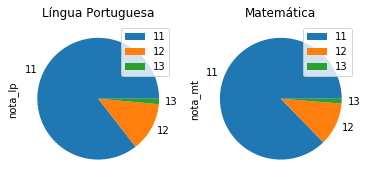

In [142]:
# Em escopo total
dados_filtrados.groupby('uf').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / len(dados_filtrados)
).plot.pie(subplots=True, figsize=(6, 4), title=['Língua Portuguesa', 'Matemática'])

<class 'numpy.int64'>
11
<class 'int'>
11
<class 'int'>
12
<class 'int'>
13


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB2C59C048>,
      dtype=object)

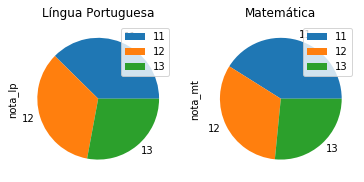

In [137]:
dados_filtrados.groupby('uf').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('uf', x.name), axis=1
).plot.pie(subplots=True, figsize=(6, 4), legend=False, title=['Língua Portuguesa', 'Matemática'])

In [ ]:
# A=> M
# B=> F
dados_filtrados.groupby(['uf', 'sexo'])[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('uf', x.name[0])
) # .plot.pie(subplots=True, figsize=(6, 4))